## This dataset contains house sale prices for King County including homes sold between           
## May 2014 and May 2015. 

## The goal is to predict the sales price for each house based on the given features.  

### Importing the necessary libraries and dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

## functions which are used repeatatively

In [3]:
#Function to plot histogram of price
def DrawHistogram(variable_name):
    n, bins, patches = plt.hist(x=variable_name, bins=100, color='green', alpha=0.5)
    plt.ylabel('Frequency')
    maxfreq = n.max()

In [4]:
def printStatistics(df1,df2):
    mse=mean_squared_error(df1,(df2))
    print("Mean squared error:"+ str(mse))
    rmse = np.sqrt(mean_squared_error(df1,(df2)))
    print("Root mean squared logarithmic error: "+ str(rmse))
    r_squared = r2_score(df1,df2)
    print("R-squared value: "+ str(r_squared))
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df2,y=df1)   

## Data Cleaning

In [5]:
#### for suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_data = pd.read_csv('KingCountyDataset.csv')

In [6]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2473350710,20141027T000000,390000,4,1.750,2330,8364,1.000,0,0,...,8,2330,0,1968,0,98058,47.457,-122.146,2180.000,9630.000
1,7100000250,20150211T000000,380000,3,1.000,1400,8710,1.000,0,0,...,7,1400,0,1948,0,98146,47.507,-122.377,1460.000,8710.000
2,1443500725,20150423T000000,280000,3,1.000,1350,7553,1.500,0,0,...,6,1350,0,1914,0,98118,47.535,-122.274,1380.000,7470.000
3,2321059093,20140805T000000,506000,3,2.500,2100,213008,1.000,0,0,...,8,2100,0,1990,0,98092,47.298,-122.144,1330.000,214315.000
4,6675500082,20140812T000000,455000,3,2.500,1600,7829,2.000,0,0,...,7,1600,0,1987,0,98034,47.729,-122.227,1580.000,9104.000


In [7]:
train_data.shape

(16000, 21)

In [8]:
train_data.nunique()

id               15887
date               353
price             3349
bedrooms            13
bathrooms           28
sqft_living        873
sqft_lot          8002
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         791
sqft_basement      279
yr_built           116
yr_renovated        68
zipcode             70
lat               4767
long               721
sqft_living15      674
sqft_lot15        7191
dtype: int64

### The dataset has 16000 rows but the number of unique ids are 15887 so, checking for duplicates

In [9]:
train_data.duplicated().sum()

0

In [10]:
IDCount = train_data.groupby('id')['yr_built','zipcode'].count()
IDCount[0:10]

,yr_built,zipcode
id,,
1000102,2,2
1200021,1,1
2800031,1,1
3800008,1,1
7200080,1,1
7200179,2,2
7400062,1,1
7600057,1,1
7600125,1,1


In [11]:
train_data.loc[train_data['id'] == 1000102]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2062,1000102,20140916T000000,280000,6,3.000,2400,9373,2.000,0,0,...,7,2400,0,1991,0,98002,47.326,-122.214,2060.000,7316.000
5649,1000102,20150422T000000,300000,6,3.000,2400,9373,2.000,0,0,...,7,2400,0,1991,0,98002,47.326,-122.214,2060.000,7316.000


In [12]:
train_data.loc[train_data['id'] == 7200179]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1254,7200179,20150424T000000,175000,2,1.000,840,12750,1.000,0,0,...,6,840,0,1925,0,98055,47.484,-122.211,1480.000,6969.000
4222,7200179,20141016T000000,150000,2,1.000,840,12750,1.000,0,0,...,6,840,0,1925,0,98055,47.484,-122.211,1480.000,6969.000


#### Hence, it is clear that the few number of homes are sold multiple time
In next step I will check if there are any missing values in dataset

In [13]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             1
sqft_living15    1
sqft_lot15       1
dtype: int64

#### There are 3 missing values in sqft_livings,sqft_lots,long, Since number of missing values are small I will remove those rows from dataset

In [14]:
train_data = train_data.dropna()

In [15]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Now the dataset is pretty clean
In next step I will look into datatypes of columns

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15999 entries, 0 to 15999
Data columns (total 21 columns):
id               15999 non-null int64
date             15999 non-null object
price            15999 non-null int64
bedrooms         15999 non-null int64
bathrooms        15999 non-null float64
sqft_living      15999 non-null int64
sqft_lot         15999 non-null int64
floors           15999 non-null float64
waterfront       15999 non-null int64
view             15999 non-null int64
condition        15999 non-null int64
grade            15999 non-null int64
sqft_above       15999 non-null int64
sqft_basement    15999 non-null int64
yr_built         15999 non-null int64
yr_renovated     15999 non-null int64
zipcode          15999 non-null int64
lat              15999 non-null float64
long             15999 non-null float64
sqft_living15    15999 non-null float64
sqft_lot15       15999 non-null float64
dtypes: float64(6), int64(14), object(1)
memory usage: 2.6+ MB


## Data analysis and Data visualization

In [17]:
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000,15999.000
mean,4577197155.245,538902.435,3.372,2.097,2071.900,15129.346,1.470,0.007,0.238,3.425,7.637,1775.070,296.830,1969.654,90.306,98077.792,47.561,-122.214,1984.453,12807.790
std,2871366938.950,368925.394,0.933,0.761,906.484,39364.492,0.529,0.086,0.771,0.660,1.172,816.176,446.144,28.908,414.824,53.749,0.139,0.140,680.831,26563.208
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.159,-122.519,460.000,659.000
25%,2125049125.500,320000.000,3.000,1.500,1420.000,5150.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.470,-122.327,1490.000,5200.000
50%,3904920390.000,450000.000,3.000,2.250,1910.000,7702.000,1.000,0.000,0.000,3.000,7.000,1550.000,0.000,1973.000,0.000,98065.000,47.573,-122.229,1840.000,7695.000
75%,7304300520.000,645000.000,4.000,2.500,2540.000,10800.500,2.000,0.000,0.000,4.000,8.000,2190.000,580.000,1994.000,0.000,98117.000,47.679,-122.125,2350.000,10125.000
max,9900000190.000,7700000.000,33.000,8.000,12050.000,1074218.000,3.500,1.000,4.000,5.000,13.000,8860.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


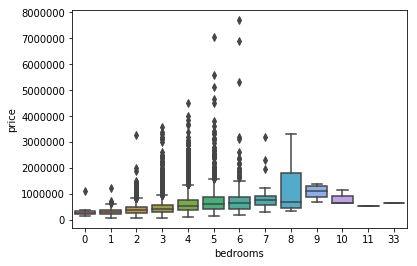

In [18]:
sns.boxplot(x= train_data['bedrooms'], y=train_data['price'])

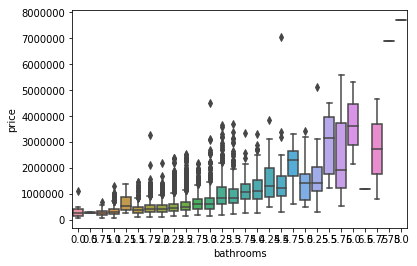

In [19]:
sns.boxplot(x= train_data['bathrooms'], y=train_data['price'])

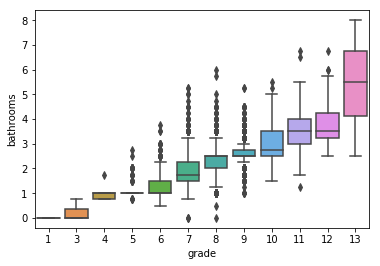

In [20]:
sns.boxplot(x= train_data['grade'], y=train_data['bathrooms'])

## From above statistics we can analyse the dataset
1.  Average price of house sold in King County is $538926.
2.  We can observe that there are very few houses which have some features and price appear far from others like 33                bedrooms or price $7700000
3.  There will always be some outliers as some luxury house prices in this dataset I did normalisation in next step to reduce       the effect of outliers
4.  The sqft_living column has maximum value of 12050 sqft, which is 3 standard deviations above mean. This can be the             case if house is luxury but  to reduce the effect I did normalisation of this column as well
5.  Avg no. of 3 bedrooms and 2 bathrooms per house were sold in King County 
6.  Avg area of house is 2071 Sqft with one house having 12050 Sqft. area
7. The dataset contains houses built from year 1900 to 2015

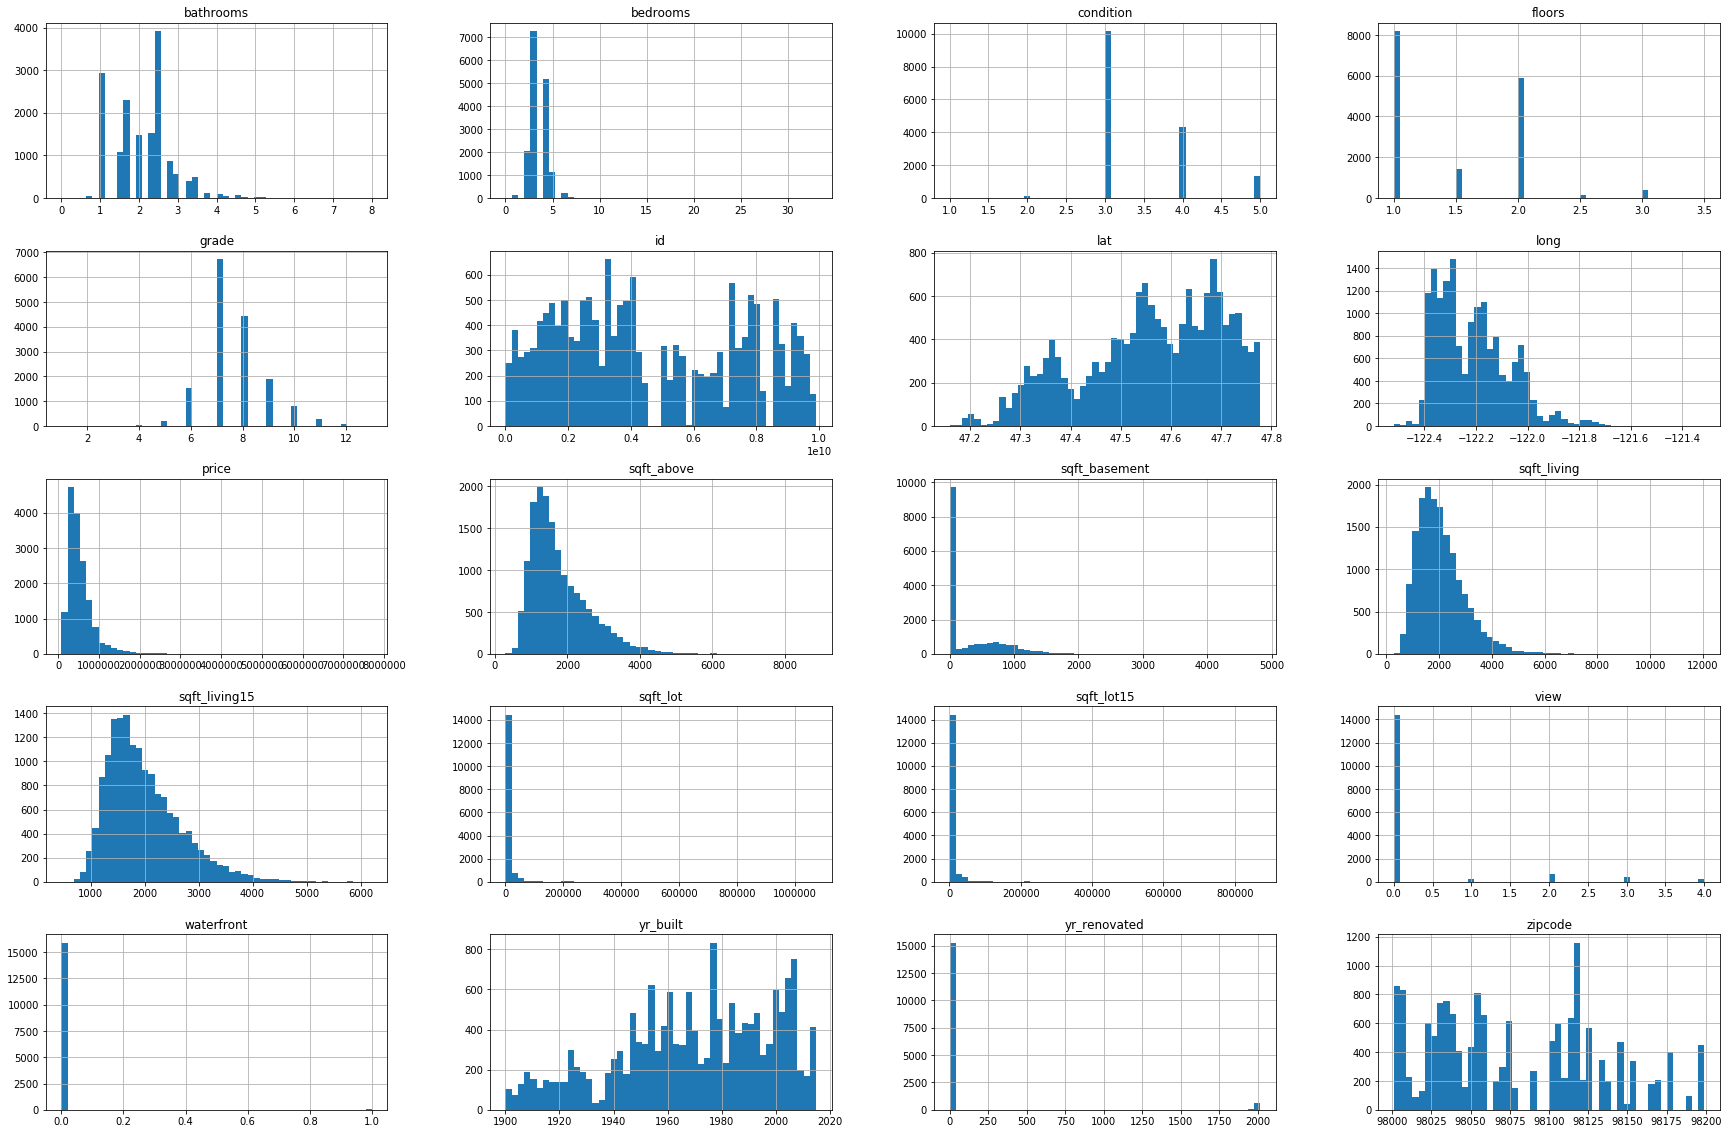

In [21]:
# Plot the histograms of each 
train_data.hist(bins=50, figsize=(30,20))
plt.show()

## Conclusions from above histrograms
1] Most of the houses in the dataset have 3 bedrooms
2] Most of the houses have condition 3 and have only 1 floor
3] Most of the houses have grade=7
4] The histograms of Price and sqft_living are right-skewed.

## Data preprocessing
The price and sqft_living has appreciable positive skewness, deviates from the normal distribution. Log transormation to make the scale numeric

Text(0.5, 0, 'price')

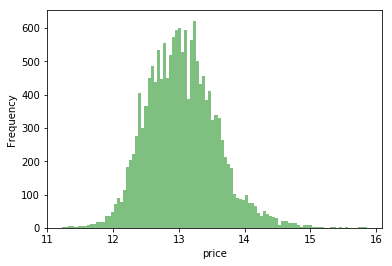

In [22]:
train_data.price = np.log(train_data.price)
DrawHistogram(train_data.price)
plt.xlabel('price')

In [23]:
train_data.price.describe()

count   15999.000
mean       13.044
std         0.530
min        11.225
25%        12.676
50%        13.017
75%        13.377
max        15.857
Name: price, dtype: float64

## Computing new columns

#### Calculating the age of house by taking the difference between year_sold and year_built

In [24]:
train_data['year_sold'] = train_data['date'].apply(lambda x: int(x[:4]))

In [25]:
train_data['house_age'] = train_data[['year_sold']].sub(train_data['yr_built'], axis=0)

#### The yr_renovated has no significance because we can not tell wheter it is renovated or not so I will create a column which will have value 0 for no renovation and 1 for renovated house.

In [26]:
train_data['is_renovated'] = train_data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

### Remove the columns date,yr_built as we have used them to calculate new column

In [27]:
train_data.drop(["yr_built", "yr_renovated","date","year_sold"], axis = 1, inplace = True) 

## Feature Selection
 Unnecessary features decrease training speed, decrease model interpretability, and, most importantly, decrease generalization performance on the test set.

In [28]:
train_data.shape

(15999, 20)

###### Now there are 20 columns in our dataset so we have to select those important features only which have high impact on price. Correlation refers to some statistical relationships involving dependence between variables.
A heatmap shows the relative intensity of a value within an array. This means that we have a large amount of numbers, and each is given a graphical representation. Those that are highest in their value – relative to the other present numbers – will be given a “hot” color, while those that are lower in their value

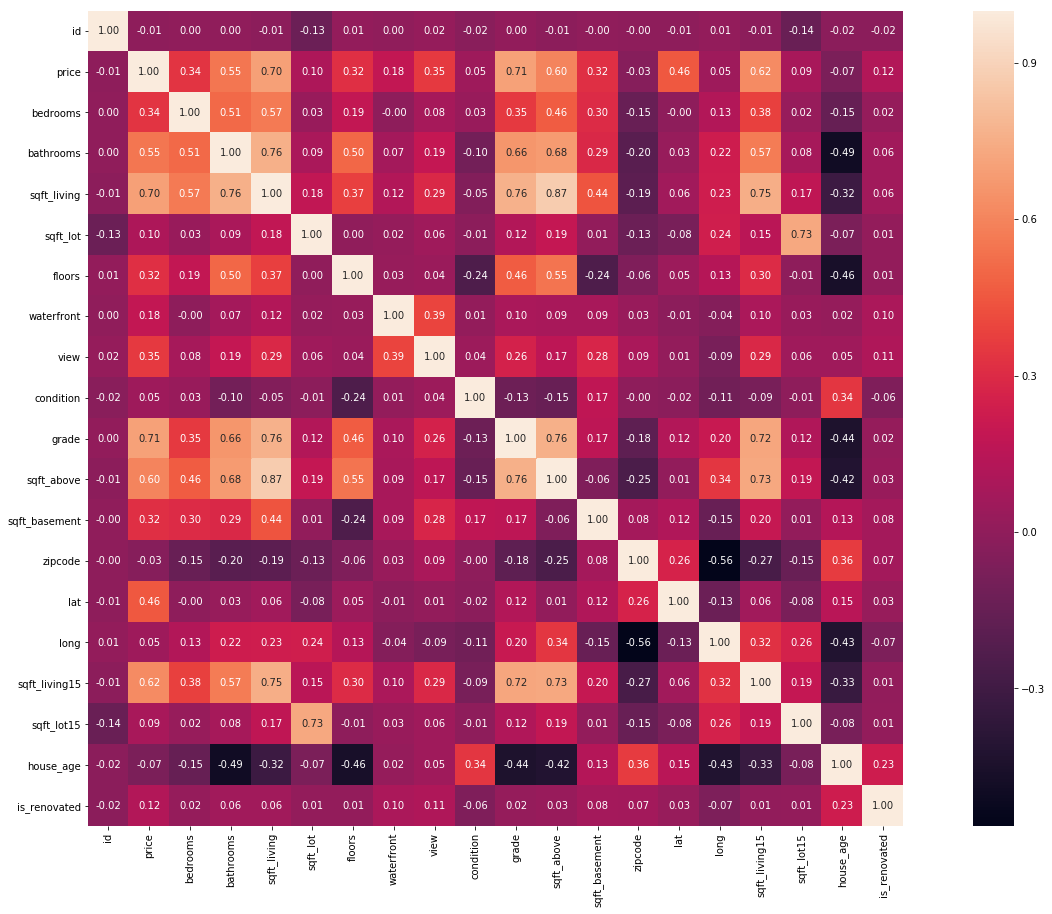

In [29]:
#price correlation matrix
corrmat =train_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

### Converting zipcodes into categories

In [30]:
train_data = pd.get_dummies(train_data,columns=['zipcode'])

### printing correlation values of each coefficient with respect to price

In [31]:
corr_matrix = train_data.corr()
cor_target=abs(corr_matrix["price"]).sort_values(ascending=False)
cor_target

price           1.000
grade           0.705
sqft_living     0.698
sqft_living15   0.624
sqft_above      0.600
bathrooms       0.552
lat             0.455
view            0.354
bedrooms        0.338
floors          0.320
sqft_basement   0.319
zipcode_98004   0.224
waterfront      0.183
zipcode_98040   0.179
zipcode_98112   0.158
zipcode_98023   0.157
zipcode_98168   0.154
zipcode_98006   0.150
zipcode_98001   0.139
zipcode_98042   0.139
zipcode_98039   0.135
zipcode_98002   0.127
is_renovated    0.123
zipcode_98075   0.122
zipcode_98033   0.118
zipcode_98003   0.113
zipcode_98198   0.112
zipcode_98178   0.108
zipcode_98199   0.108
zipcode_98030   0.106
                 ... 
zipcode_98116   0.055
zipcode_98056   0.055
zipcode_98029   0.054
condition       0.053
zipcode_98108   0.052
zipcode_98177   0.051
zipcode_98008   0.051
long            0.048
zipcode_98155   0.046
zipcode_98148   0.046
zipcode_98126   0.038
zipcode_98107   0.037
zipcode_98007   0.033
zipcode_98144   0.031
zipcode_98

### As we can see the correlation value for grade, sqft_living,sqft_living15, sqft_above ,bathrooms, lat ,view,          bedrooms, floors are above 0.3 and other features have much less coefficients. So now I will try to visualize whether the correlation values above reflects the same.

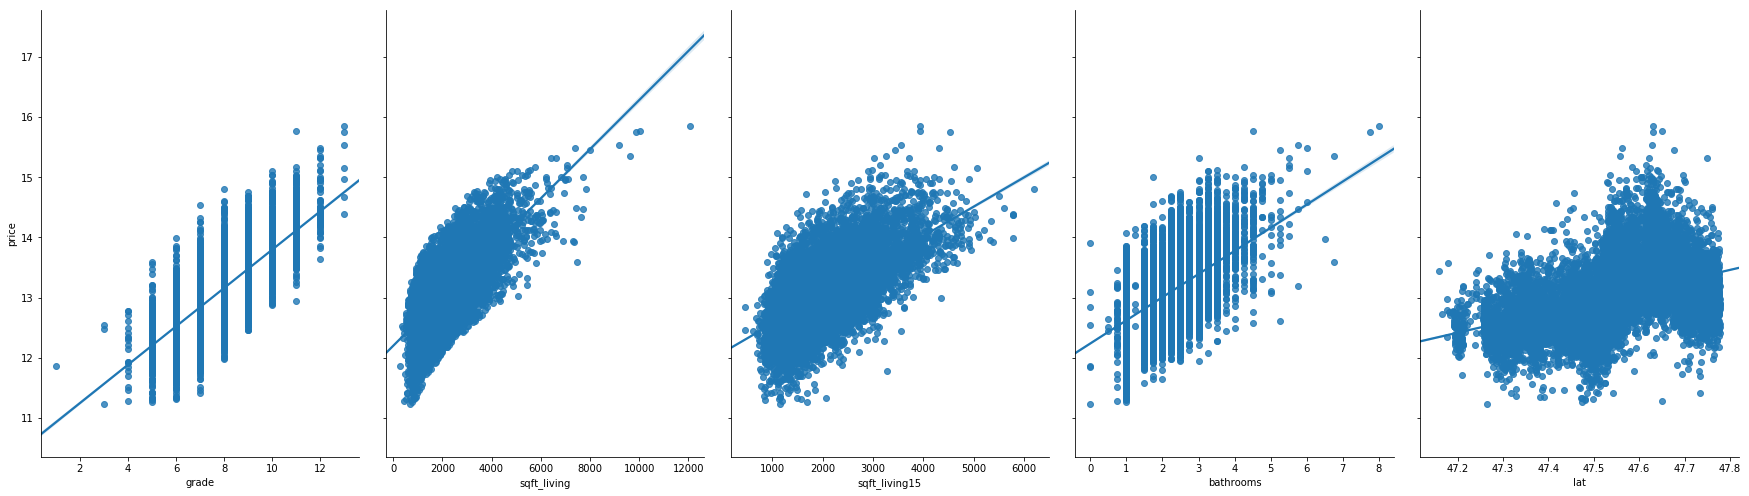

In [32]:
sns.pairplot(train_data, x_vars=['grade','sqft_living','sqft_living15','bathrooms','lat'], y_vars='price', size=7, aspect=0.7, kind='reg')


### The visualisation makes it clear that with sqft_living, grade, bathrooms,lat features price of houses increases significantly

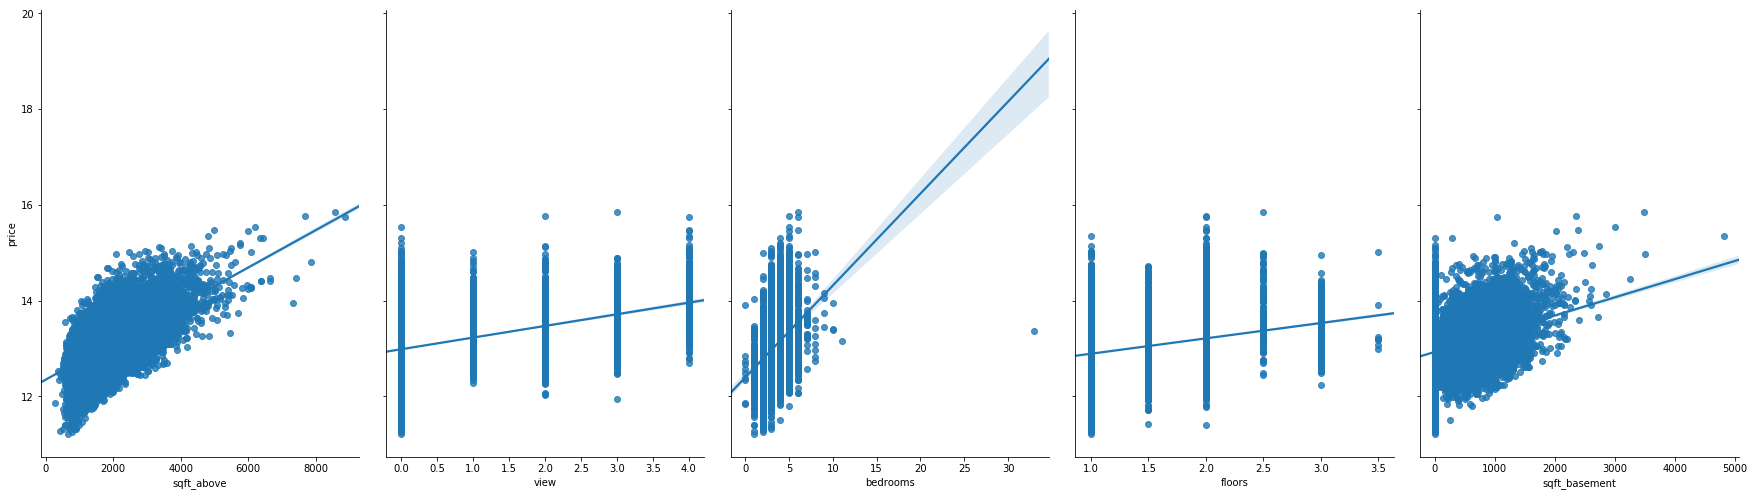

In [33]:
sns.pairplot(train_data, x_vars=['sqft_above','view','bedrooms','floors','sqft_basement'], y_vars='price', size=7, aspect=0.7, kind='reg')


### The visualisation makes it clear with sqft_above, view, bedrooms,floors,sqft_basement features price of houses shows slight increase but not as significant as above features

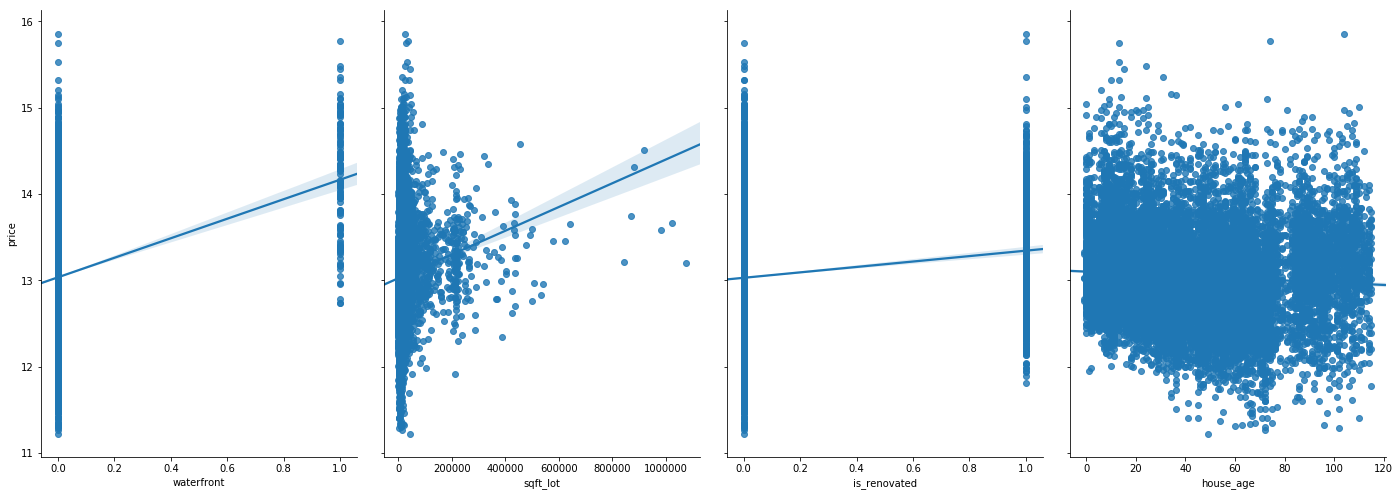

In [34]:
sns.pairplot(train_data, x_vars=['waterfront','sqft_lot','is_renovated','house_age'], y_vars='price', size=7, aspect=0.7, kind='reg')

### Surprisingly, age of house or whether it is renovated or not does not affect the price of house much. 
#### Now I will keep only those features whose value is greater than 0.5. 
#### One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.
#### So, I will exclude sqft_living15 because it is highly correlated with sqft_living(0.76). 

In [35]:
#Selecting highly correlated features
relevant_features1 = cor_target[cor_target>0.5]
relevant_features1

price           1.000
grade           0.705
sqft_living     0.698
sqft_living15   0.624
sqft_above      0.600
bathrooms       0.552
Name: price, dtype: float64

In [36]:
main_features1 = ['grade','sqft_living','sqft_above','bathrooms']
X1 = train_data[main_features1]
y1 = train_data.price

In [37]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)

## Model Implementation

### 1] Simple linear regression

In [38]:
#Initialize Linear Regression variable
LinearRegression1 = linear_model.LinearRegression()
LinearRegression1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Mean squared error:0.12044726420088019
Root mean squared logarithmic error: 0.3470551313565039
R-squared value: 0.5651693127722155


'Accuracy: 57%'

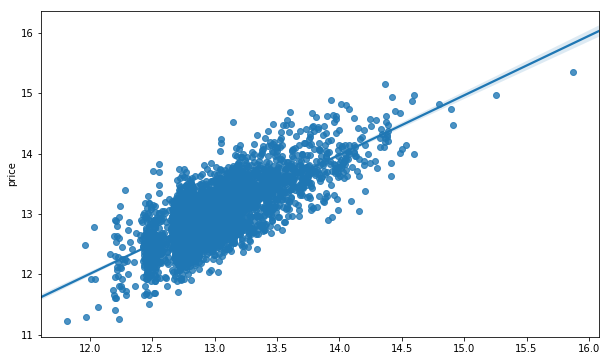

In [39]:
predictions1 = LinearRegression1.predict(X_test1)
printStatistics(y_test1,predictions1)
accuracy = LinearRegression1.score(X_test1, y_test1)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [40]:
scores = cross_val_score( LinearRegression1, X1, y1, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.5670346575871924


### The previous model has R squared very low it is because I have used less features to predict the price. 
### Now I will include more features to increase the R squared value by  selecting features which have 
### correlation coefficient>0.2

In [41]:
#Selecting highly correlated features
relevant_features2 = cor_target[cor_target>0.2]
relevant_features2

price           1.000
grade           0.705
sqft_living     0.698
sqft_living15   0.624
sqft_above      0.600
bathrooms       0.552
lat             0.455
view            0.354
bedrooms        0.338
floors          0.320
sqft_basement   0.319
zipcode_98004   0.224
Name: price, dtype: float64

In [42]:
main_features2 = ['grade','sqft_living','sqft_living15','sqft_above','bathrooms','view','lat','bedrooms',
                  'sqft_basement','waterfront','zipcode_98004','floors']
X2 = train_data[main_features2]
y2 = train_data.price

In [43]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=0)

#### I will check the best possible features to train the model by using recursive feature elimination.
#### It uses accuracy metric to rank the feature according to their importance. 
#### The RFE method takes the model to be used and the number of required features as input.

### Recursive feature elimination

In [44]:
#no of features
nof_list=np.arange(1,12)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train2,y_train2)
    X_test_rfe = rfe.transform(X_test2)
    model.fit(X_train_rfe,y_train2)
    score = model.score(X_test_rfe,y_test2)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.745401


In [45]:
cols = list(X_train2.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 11)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y2)  
#Fitting the data to model
model.fit(X_rfe,y2)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['grade', 'sqft_living', 'sqft_above', 'bathrooms', 'view', 'lat',
       'bedrooms', 'sqft_basement', 'waterfront', 'zipcode_98004', 'floors'],
      dtype='object')


In [46]:
main_features3 = ['grade', 'sqft_living', 'sqft_above', 'bathrooms', 'view', 'lat',
       'bedrooms', 'sqft_basement', 'waterfront', 'zipcode_98004', 'floors']
X3 = train_data[main_features3]
y3 = train_data.price

In [47]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=0)

###  2] Complex Linear Regression(with more features)

In [48]:
#Initialize Linear Regression variable
LinearRegression2 = linear_model.LinearRegression()
LinearRegression2.fit(X_train3,y_train3)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Mean squared error:0.07052330993778186
Root mean squared logarithmic error: 0.265562252471585
R-squared value: 0.745401445775639


'Accuracy: 75%'

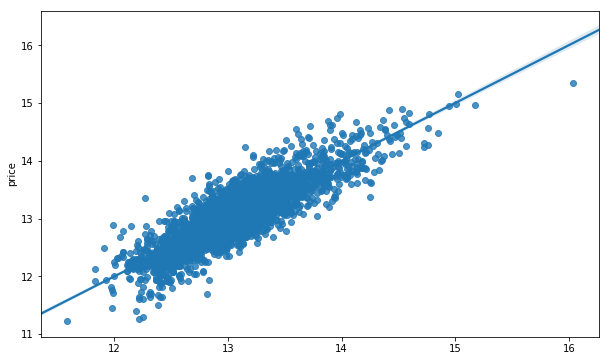

In [49]:
predictions2 = LinearRegression2.predict(X_test3)
printStatistics(y_test3,predictions2)
accuracy = LinearRegression2.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

## Cross Validation
Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

In [50]:
scores = cross_val_score( LinearRegression2, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.7472631527893752


## 3] Ridge regression

Mean squared error:0.07051633529544411
Root mean squared logarithmic error: 0.2655491203062893
R-squared value: 0.7454266251646522


'Accuracy: 75%'

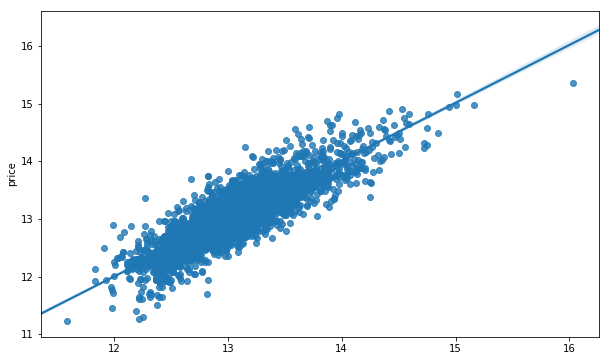

In [51]:
ridgeReg = Ridge(alpha=0.01, normalize=True)
ridgeReg.fit(X_train3,y_train3)
predictions3 = ridgeReg.predict(X_test3)
printStatistics(y_test3,predictions3)
accuracy = ridgeReg.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [52]:
scores = cross_val_score( ridgeReg, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.7472377465858149


## 4] polynomial regression

Mean squared error:0.06365442740248992
Root mean squared logarithmic error: 0.2522982905262933
R-squared value: 0.770199027797316


'Accuracy: 77%'

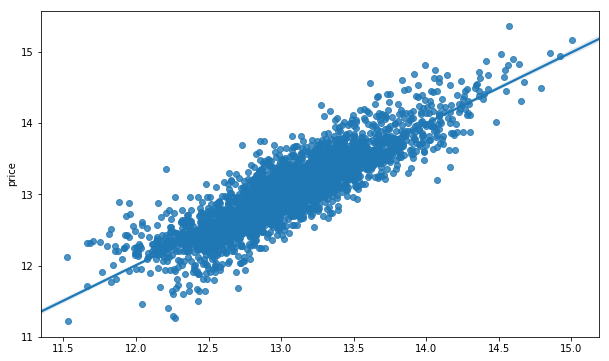

In [53]:
from sklearn.preprocessing import PolynomialFeatures
# Quadratic
poly = PolynomialFeatures(degree=2)
X_train4 = poly.fit_transform(X_train3)
X_test4 = poly.fit_transform(X_test3)
QuadraticPolynomial = LinearRegression2.fit(X_train4, y_train3)
predictions4 = QuadraticPolynomial.predict(X_test4)
printStatistics(y_test3,predictions4)
accuracy = QuadraticPolynomial.score(X_test4, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [54]:
predictions4

array([12.49280147, 12.78836165, 13.27352236, ..., 13.15771107,
       13.37537594, 12.70661287])

In [55]:
scores = cross_val_score(QuadraticPolynomial, X_train4, y_train3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.7651507621511534


### 5]  Lasso Regression

Mean squared error:0.08118880670508938
Root mean squared logarithmic error: 0.2849364959163522
R-squared value: 0.7068975800405122


'Accuracy: 71%'

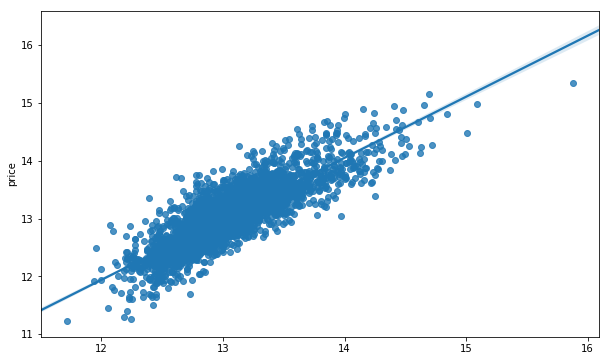

In [56]:
lasso = Lasso(alpha=0.01)
lassoModel=lasso.fit(X_train3,y_train3)
predictions_lasso = lassoModel.predict(X_test3)
printStatistics(y_test3,predictions_lasso)
accuracy = lassoModel.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

### Models with all features

In [57]:
X_whole_features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age', 'is_renovated', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

In [58]:
X_whole = train_data[X_whole_features]
y_whole = train_data.price

In [59]:
import statsmodels.api as sm
#Backward Elimination
cols = list(X_whole.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_whole[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_whole,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'house_age', 'is_renovated', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112

In [60]:
X_whole_features1=['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
                   'sqft_basement', 'lat', 'long', 'sqft_living15', 'house_age', 'is_renovated', 'zipcode_98001', 
                   'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 
                   'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 
                   'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 
                   'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98040',
                   'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
                   'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 
                   'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 
                   'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 
                   'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
                   'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 
                   'zipcode_98155','zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 
                   'zipcode_98198', 'zipcode_98199']

In [61]:
X_whole = train_data[X_whole_features1]
y_whole = train_data.price

In [62]:
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(X_whole, y_whole, test_size=0.20, random_state=0)

### 6] Rigde regression with more features

Mean squared error:0.0519953730951871
Root mean squared logarithmic error: 0.22802493963421436
R-squared value: 0.8122897687577362


'Accuracy: 81%'

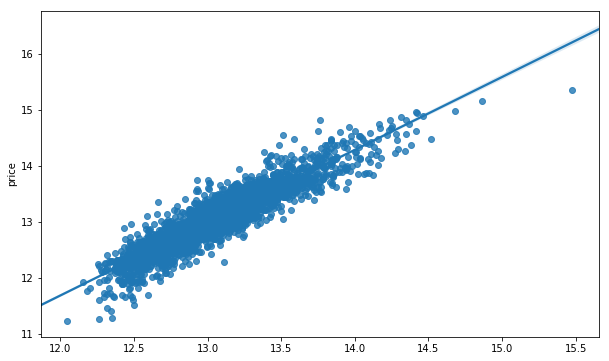

In [63]:
ridgeReg2 = Ridge(alpha=1, normalize=True)
ridgeReg2.fit(X_train_whole,y_train_whole)
predictions_whole = ridgeReg2.predict(X_test_whole)
printStatistics(y_test_whole,predictions_whole)
accuracy = ridgeReg2.score(X_test_whole, y_test_whole)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [64]:
scores = cross_val_score(ridgeReg2, X_whole, y_whole, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.8082974683787143


### 7] Lasso Model with more features
The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

Mean squared error:0.06989703532034212
Root mean squared logarithmic error: 0.2643804745444378
R-squared value: 0.7476623806677796


'Accuracy: 75%'

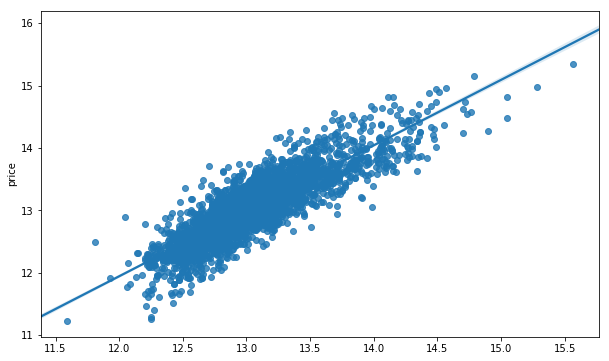

In [65]:
lasso = Lasso(alpha=0.01)
lassoModel=lasso.fit(X_train_whole,y_train_whole)
predictions_whole_lasso = lassoModel.predict(X_test_whole)
printStatistics(y_test_whole,predictions_whole_lasso)
accuracy = lassoModel.score(X_test_whole, y_test_whole)
"Accuracy: {}%".format(int(round(accuracy * 100)))

## Summary of all models

In [66]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "files/summary.png")

## Loading the dataset for which we have to predict the value

In [84]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
submission_test=pd.read_csv('Test_set.csv')

In [85]:
submission_test.shape

(4222, 20)

In [86]:
submission_test['year_sold'] = submission_test['date'].apply(lambda x: int(x[:4]))

In [87]:
submission_test['house_age'] = submission_test[['year_sold']].sub(submission_test['yr_built'], axis=0)

In [88]:
submission_test['is_renovated'] = submission_test['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

Now I will to process the test data same as I did for train data
2] Converting zipcode to categories
3] As I have not used the new columns created for train dataset I will not create them for test dataset
4] Drop the unwanted columns

In [89]:
submission_test.drop(["yr_built", "yr_renovated","date"], axis = 1, inplace = True) 

In [90]:
submission_test = pd.get_dummies(submission_test,columns=['zipcode'])

In [91]:
X_new=submission_test[X_whole_features1]

In [92]:
#X_test_new = poly.fit_transform(X_new)

TypeError: 'Ridge' object is not callable

In [93]:
new_pred_class=ridgeReg2.predict(X_new)

In [94]:
new_pred_class

array([13.56707533, 13.13427486, 12.75653559, ..., 12.94021394,
       12.56232113, 12.56099069])

In [95]:
pd.DataFrame({'ID':submission_test.id,'Price':new_pred_class}).set_index('ID').to_csv('submission1.csv')